<a href="https://www.kaggle.com/code/amil09/bellabeat-case-study-in-python?scriptVersionId=123277923" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Case Study : How Can a Wellness Technology Company Play It Smart ?](https://www.coursera.org/account/accomplishments/verify/EE4BU9UEARKM?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=course)

### Bellabeat
Bellabeat is a high-tech company that manufactures health-focused smart products. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.
By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website.

![image](https://user-images.githubusercontent.com/92245436/152644691-7a14db0b-d487-4f72-a8aa-d1f83268d739.png)

### Products
- **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits.
- **Leaf:** Bellabeat’s classic wellness **tracker** can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.
- **Time:** This wellness **watch** combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
- **Spring:** This is a **water bottle** that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your *hydration* levels.
- **Bellabeat membership:** Bellabeat also offers a **subscription-based membership** program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

### Goal: Analyze smart device data to gain insight into how consumers are using their smart devices in order to present high-level recommendations for Bellabeat’s marketing strategy.

# 1. Ask
Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. 
- 1. What are some trends in smart device usage?
- 2. How could these trends apply to Bellabeat customers?
- 3. How could these trends help influence Bellabeat marketing strategy?

In [61]:
#load libraries

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Prepare
[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain): This Kaggle data set
contains personal fitness tracker from thirty fitbit users.
#### Data Consent 
Thirty Three eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. <br>
[Metadata](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf) contains information about the data types and data description.
- Data is organized in 18 CSV files. It has both long and wide formats.
- This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between `03/12/2016 - 05/12/2016`.

#### 2.1 Limitations of Data Set:
- Data collected from year 2016, hence data may not be timely or relevant.
- Sample size of 33 female FitBit users is not representative of the entire female population.
- As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

#### 2.2 Is Data ROCCC?
A good data source is **ROCCC** which stands for **Reliable, Original, Comprehensive, Current,** and **Cited**.

- **Reliable -** *LOW* - Not reliable as it only has 33 respondents
- **Original -** *LOW* - Third party provider (Amazon Mechanical Turk)
- **Comprehensive** - *MED* - Parameters match most of Bellabeat's products' parameters
- **Current** - *LOW* - Data is more than 5 years old and is not relevant
- **Cited** - *LOW* - Data collected from third party, hence unknown

In [62]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

# 3. Process
### 3.1 Selected Data
- daily_activity 
- hourly_calories
- sleep_day
- weight_log

In [63]:
daily_activity = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_calories = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
weight_log = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
sleep_day = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

#### daily_activity <br>
We will start our analysis with `daily_activity` data which contains information about 33 users. <br>

first update column name to small case

In [64]:
daily_activity.rename(columns = {"Id":"id", "ActivityDate":"activity_date", "TotalSteps":"total_steps","TotalDistance":"total_distance",
                                 "TrackerDistance":"track_distance", "LoggedActivitiesDistance":"log_activities_distance", 
                                 "VeryActiveDistance":"very_active_distance", "ModeratelyActiveDistance":"moderate_active_distance", 
                                 "LightActiveDistance":"light_active_distance", "SedentaryActiveDistance":"sedentary_active_distance",
                                 "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", 
                                 "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", 
                                 "Calories":"calories"}, inplace = True)


daily_activity.head(5)

,id,activity_date,total_steps,total_distance,track_distance,log_activities_distance,very_active_distance,moderate_active_distance,light_active_distance,sedentary_active_distance,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### 3.2 Data Cleaning 
#### daily_activity
- In `daily_activity` we have total 15 different columns and 940 entries and 33 unique users.
- daily_activity dataframe doesn't contain any null values (missing values)
- Remove rows  that the `total_steps` is <= 100 (87 rows removed) or  it would distort the daily averages.
- `total_distance` and `track_distance`are almost identical (838 rows are equal)
- Add columns that contains `day of the week` , `day of the week number` and `total_hours` of each user.

In [65]:
# drop users that have TotalSteps <= 100
daily_activity.drop(daily_activity[daily_activity['total_steps']<100].index, inplace=True)
daily_activity.shape

# out of 940, 87 rows removed 853 left.

(853, 15)

add `day_of_week` , `day_of_week_no` and `total_hours` column in `daily_activity`

In [66]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         853 non-null    int64  
 1   activity_date              853 non-null    object 
 2   total_steps                853 non-null    int64  
 3   total_distance             853 non-null    float64
 4   track_distance             853 non-null    float64
 5   log_activities_distance    853 non-null    float64
 6   very_active_distance       853 non-null    float64
 7   moderate_active_distance   853 non-null    float64
 8   light_active_distance      853 non-null    float64
 9   sedentary_active_distance  853 non-null    float64
 10  very_active_mins           853 non-null    int64  
 11  fairly_active_mins         853 non-null    int64  
 12  lightly_active_mins        853 non-null    int64  
 13  sedentary_mins             853 non-null    int64  

In [67]:
daily_activity['day_of_week_no'] = pd.to_datetime(daily_activity['activity_date']).dt.dayofweek
daily_activity["day_of_week_no"]

0      1
1      2
2      3
3      4
4      5
      ..
935    6
936    0
937    1
938    2
939    3
Name: day_of_week_no, Length: 853, dtype: int64

In [68]:
daily_activity["very_active_mins"] 

0      25
1      21
2      30
3      29
4      36
       ..
935    17
936    73
937    18
938    88
939    23
Name: very_active_mins, Length: 853, dtype: int64

In [69]:
# convert activity_date from object dtype to datetime64 
daily_activity["activity_date"] = pd.to_datetime(daily_activity["activity_date"])

# to get weekname
daily_activity["day_of_week"] = daily_activity["activity_date"].dt.day_name()  

# to get weeknumber
daily_activity['day_of_week_no'] = pd.to_datetime(daily_activity['activity_date']).dt.dayofweek

# add total minutes and convert it into hrs 

total_minutes = daily_activity["very_active_mins"] + daily_activity["moderate_active_distance"] +\
                              daily_activity["fairly_active_mins"] + daily_activity["sedentary_mins"]

daily_activity["total_hours"] = round((total_minutes / 60),2)
daily_activity.head(3)

,id,activity_date,total_steps,total_distance,track_distance,log_activities_distance,very_active_distance,moderate_active_distance,light_active_distance,sedentary_active_distance,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day_of_week_no,day_of_week,total_hours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,Tuesday,12.78
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,Wednesday,13.61
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3,Thursday,20.99


In [70]:
daily_activity[['total_steps','total_distance','total_hours','sedentary_mins','calories']].describe()

,total_steps,total_distance,total_hours,sedentary_mins,calories
count,853.000000,853.000000,853.000000,853.000000,853.000000
mean,8416.616647,6.049414,16.540152,953.554513,2372.992966
std,4686.391097,3.685989,4.510982,274.288526,695.671508
min,108.000000,0.080000,0.280000,13.000000,52.000000
25%,4978.000000,3.450000,12.780000,721.000000,1867.000000
50%,8095.000000,5.640000,17.520000,1020.000000,2225.000000
75%,11107.000000,7.960000,20.410000,1187.000000,2839.000000
max,36019.000000,28.030001,24.000000,1440.000000,4900.000000


### Observations 
- The average of Calories from the data is **2372**, which is close to the recommended daily calorie intake, **2,000** calories a day for women and **2,500** for men.
- The average no. of steps from data is **8416.61**,which comes under somewhat active category.
- The Sedentary minutes is around **953.5** which is fairly high compare to others.

### weight_log
- In `weight_log` we have total 8 different columns and 67 entries and 8 unique users.
- delete the columns LogId and Fat as they do not hve any relevant information.

In [71]:
#delete the columns LogId and Fat
weight_log.drop('LogId', inplace=True, axis=1)
weight_log.drop('Fat', inplace=True, axis=1)

In [72]:
# update column name to small case
weight_log.rename(columns = {"Id":"id", "Date":"activity_date", "WeightKg":"weight_kg","WeightPounds":"weight_pounds","BMI":"bmi", 
                                 "IsManualReport":"is_manual_report",}, inplace = True)

weight_log.head(5)

,id,activity_date,weight_kg,weight_pounds,bmi,is_manual_report
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True


In [73]:
#convert the object data type into a Pandas date time object
weight_log['activity_date']= pd.to_datetime(weight_log['activity_date'])

weight_log.head()

,id,activity_date,weight_kg,weight_pounds,bmi,is_manual_report
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True


In [74]:
weight_log.describe()

,id,weight_kg,weight_pounds,bmi
count,6.700000e+01,67.000000,67.000000,67.000000
mean,7.009282e+09,72.035821,158.811801,25.185224
std,1.950322e+09,13.923206,30.695415,3.066963
min,1.503960e+09,52.599998,115.963147,21.450001
25%,6.962181e+09,61.400002,135.363832,23.959999
50%,6.962181e+09,62.500000,137.788914,24.389999
75%,8.877689e+09,85.049999,187.503152,25.559999
max,8.877689e+09,133.500000,294.317120,47.540001


### [Observation ](https://en.wikipedia.org/wiki/Body_mass_index)
- The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of `kg/m2`
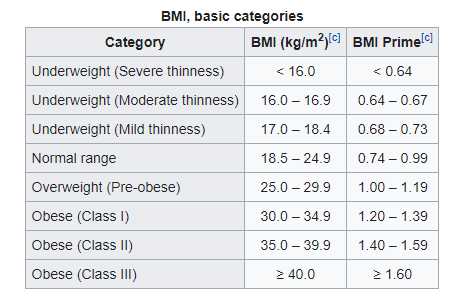

- minimum bmi is **21.45** which is in **normal range**.
- maximum bmi is **47.54** which is in **obese (class III)** we have look further.

### hourly_calories

- In `hourly_calories` we have total 3 different columns and 22099 entries and 33 unique users.
- hourly_calories dataframe doesn't contain any null values (missing values)
- Add columns that contains `day of the week`  and `day of the week number` ` of each user.

In [75]:
# update column name to small case
hourly_calories.rename(columns = {"Id":"id", "ActivityHour":"activity_date", 
                                 "Calories":"calories",}, inplace = True)

In [76]:
# add day_of_the_week column in hourly_calories
hourly_calories["activity_date"] = pd.to_datetime(hourly_calories["activity_date"])
hourly_calories["day_of_week"] = hourly_calories["activity_date"].dt.day_name()
hourly_calories['day_of_week_no'] = pd.to_datetime(hourly_calories['activity_date']).dt.dayofweek
hourly_calories.head(5)


,id,activity_date,calories,day_of_week,day_of_week_no
0,1503960366,2016-04-12 00:00:00,81,Tuesday,1
1,1503960366,2016-04-12 01:00:00,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,59,Tuesday,1
3,1503960366,2016-04-12 03:00:00,47,Tuesday,1
4,1503960366,2016-04-12 04:00:00,48,Tuesday,1


In [77]:
hourly_calories.describe()

,id,calories,day_of_week_no
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,97.386760,2.917870
std,2.422500e+09,60.702622,1.952786
min,1.503960e+09,42.000000,0.000000
25%,2.320127e+09,63.000000,1.000000
50%,4.445115e+09,83.000000,3.000000
75%,6.962181e+09,108.000000,5.000000
max,8.877689e+09,948.000000,6.000000


### Observation 
- **A calorie is a unit of measurement** — but it doesn't measure weight or length. **A calorie is a unit of energy.**
- minimum calories burn = 42
- maximum calories is 948. It seems 948 is oulier we have to look further.


### sleep_day
- In `sleep_day` we have total 5 different columns and 413 entries and 24 unique users.
- sleep_day dataframe doesn't contain any null values (missing values)


In [78]:
# update column name to small case
sleep_day.rename(columns = {"Id":"id", "SleepDay":"activity_date", "TotalSleepRecords":"total_sleep_records",
                            "TotalMinutesAsleep":"total_mins_sleep","TotalTimeInBed":"total_time_in_bed",}, inplace = True)

In [79]:
#add day_of_the_week column in hourly_calories

sleep_day["activity_date"] = pd.to_datetime(sleep_day["activity_date"], format="%m/%d/%Y %H:%M:%S %p")
sleep_day["day_of_week"] = sleep_day["activity_date"].dt.day_name()
sleep_day.head(5)

,id,activity_date,total_sleep_records,total_mins_sleep,total_time_in_bed,day_of_week
0,1503960366,2016-04-12 12:00:00,1,327,346,Tuesday
1,1503960366,2016-04-13 12:00:00,2,384,407,Wednesday
2,1503960366,2016-04-15 12:00:00,1,412,442,Friday
3,1503960366,2016-04-16 12:00:00,2,340,367,Saturday
4,1503960366,2016-04-17 12:00:00,1,700,712,Sunday


In [80]:
sleep_day.describe()

,id,total_sleep_records,total_mins_sleep,total_time_in_bed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


### Observation
- maximum sleep is 796 min that is 13.26 hrs
- minimum sleep time is 58 min it seems odd we have to look further

# 4. Analyze
#### daily_activity

aggregate individual user data by the using  `groupby()` and `mean()` function to get some averages for each user:

In [81]:
daily_activity_agg = daily_activity.groupby(['id']).mean().reset_index()

daily_activity_agg.sort_values(by='total_steps', inplace=True)

daily_activity_agg = daily_activity_agg[['id','total_steps','total_hours','calories']]

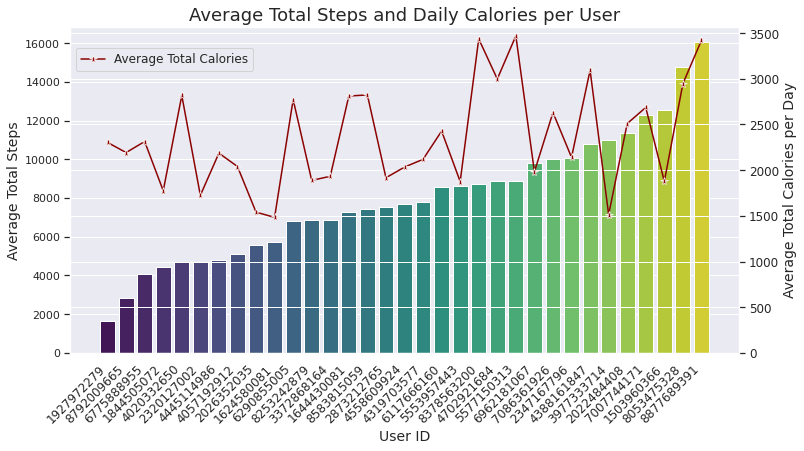

In [82]:
# Select relevant columns and sort by total steps
selected_daily_activity = daily_activity_agg[['total_steps', 'calories', 'id']].sort_values(['total_steps']).reset_index().drop(['index'], axis=1)

# Define the order of the bars based on the user ID
order_Id = selected_daily_activity['id'].to_list()

# Set the style of the plot
sns.set_style('darkgrid')

# Create a bar plot showing the average total steps per user
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=selected_daily_activity, x='id', y='total_steps', ax=ax1, palette='viridis', order=order_Id, capsize=.2, errwidth=1, ci=None)

# Set the labels and title for the plot
plt.ylabel('Average Total Steps', size=14)
plt.xlabel('User ID', size=14)
plt.title('Average Total Steps and Daily Calories per User', size=18)

# Set the rotation and alignment of the x-axis labels
plt.xticks(rotation=45, horizontalalignment='right', size=12)

# Create a line plot showing the average total calories per user
ax2 = ax1.twinx()
sns.lineplot(data=selected_daily_activity['calories'], ax=ax2, marker='*', markersize=8, color='darkred', label='Average Total Calories')

# Set the labels and formatting for the second y-axis
ax2.set_ylim(0, None)
ax2.set_ylabel('Average Total Calories per Day', size=14)
ax2.tick_params(axis='y', labelsize=12)

# Add legend to the line plot
ax2.legend(loc='center left', bbox_to_anchor=(0.0, 0.9), fontsize=12)

# Set the figure resolution
plt.rcParams['figure.dpi'] = 150;

plt.savefig('averag_steps.png', bbox_inches='tight')

# Show the plot
plt.show()


- It's important to note that people also burn calories by doing different activities (not just steps).

The following are preliminary recommendations developed as a guide on how many daily steps are sufficient for health benefits in generally healthy adults.

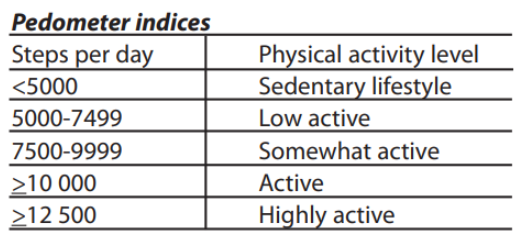

Text(0.5, 1.0, 'User Types by Daily Activity Level')

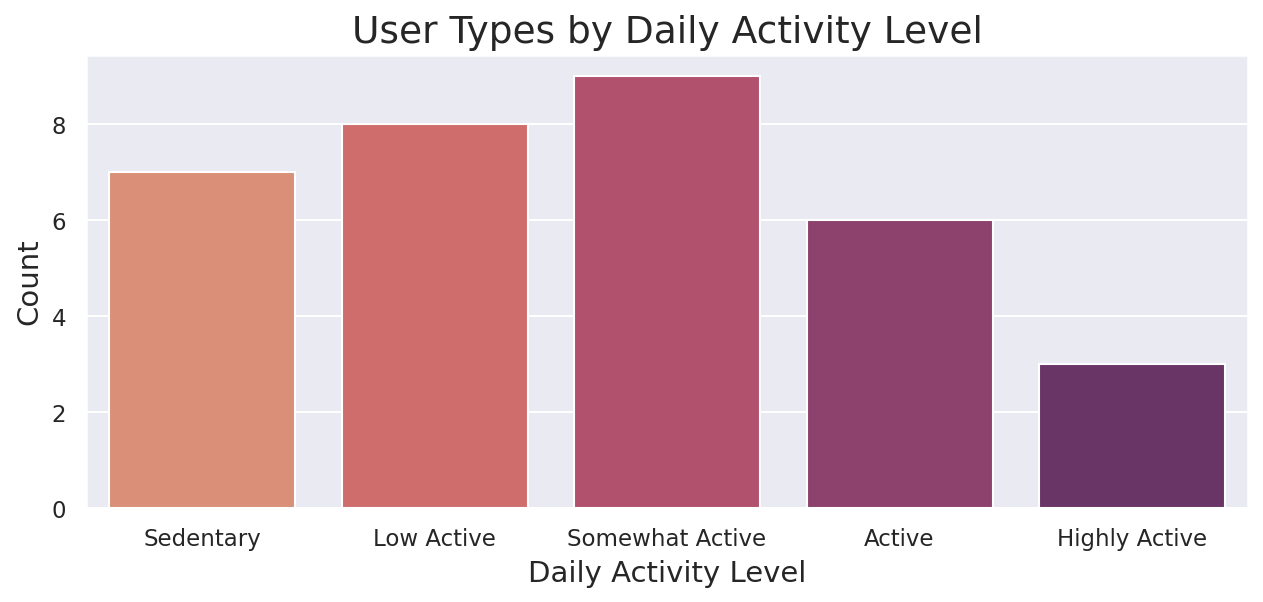

In [83]:
def activity_type(total_steps):
    """
    Determine the daily activity type based on the total number of steps taken.

    Args:
    total_steps (int): The total number of steps taken.

    Returns:
    str: The daily activity type, which can be 'Sedentary', 'Low Active', 'Somewhat Active', 'Active', or 'Highly Active'.
    """
    if total_steps < 5000:
        return "Sedentary"
    elif 5000 <= total_steps < 7500:
        return "Low Active"
    elif 7500 <= total_steps < 10000:
        return "Somewhat Active"
    elif 10000 <= total_steps < 12500:
        return "Active"
    else:
        return "Highly Active"

daily_activity_agg['activity_type'] = daily_activity_agg['total_steps'].apply(lambda x: activity_type(x))

fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='activity_type', data=daily_activity_agg, order=['Sedentary',"Low Active", "Somewhat Active",\
                                                                 "Active","Highly Active"], palette = "flare")
ax.set_xlabel('Daily Activity Level', size=14)
ax.set_ylabel('Count', size=14)
ax.set_title('User Types by Daily Activity Level', size=18)
#plt.savefig('User Types by Daily Activity Level.png', bbox_inches='tight')


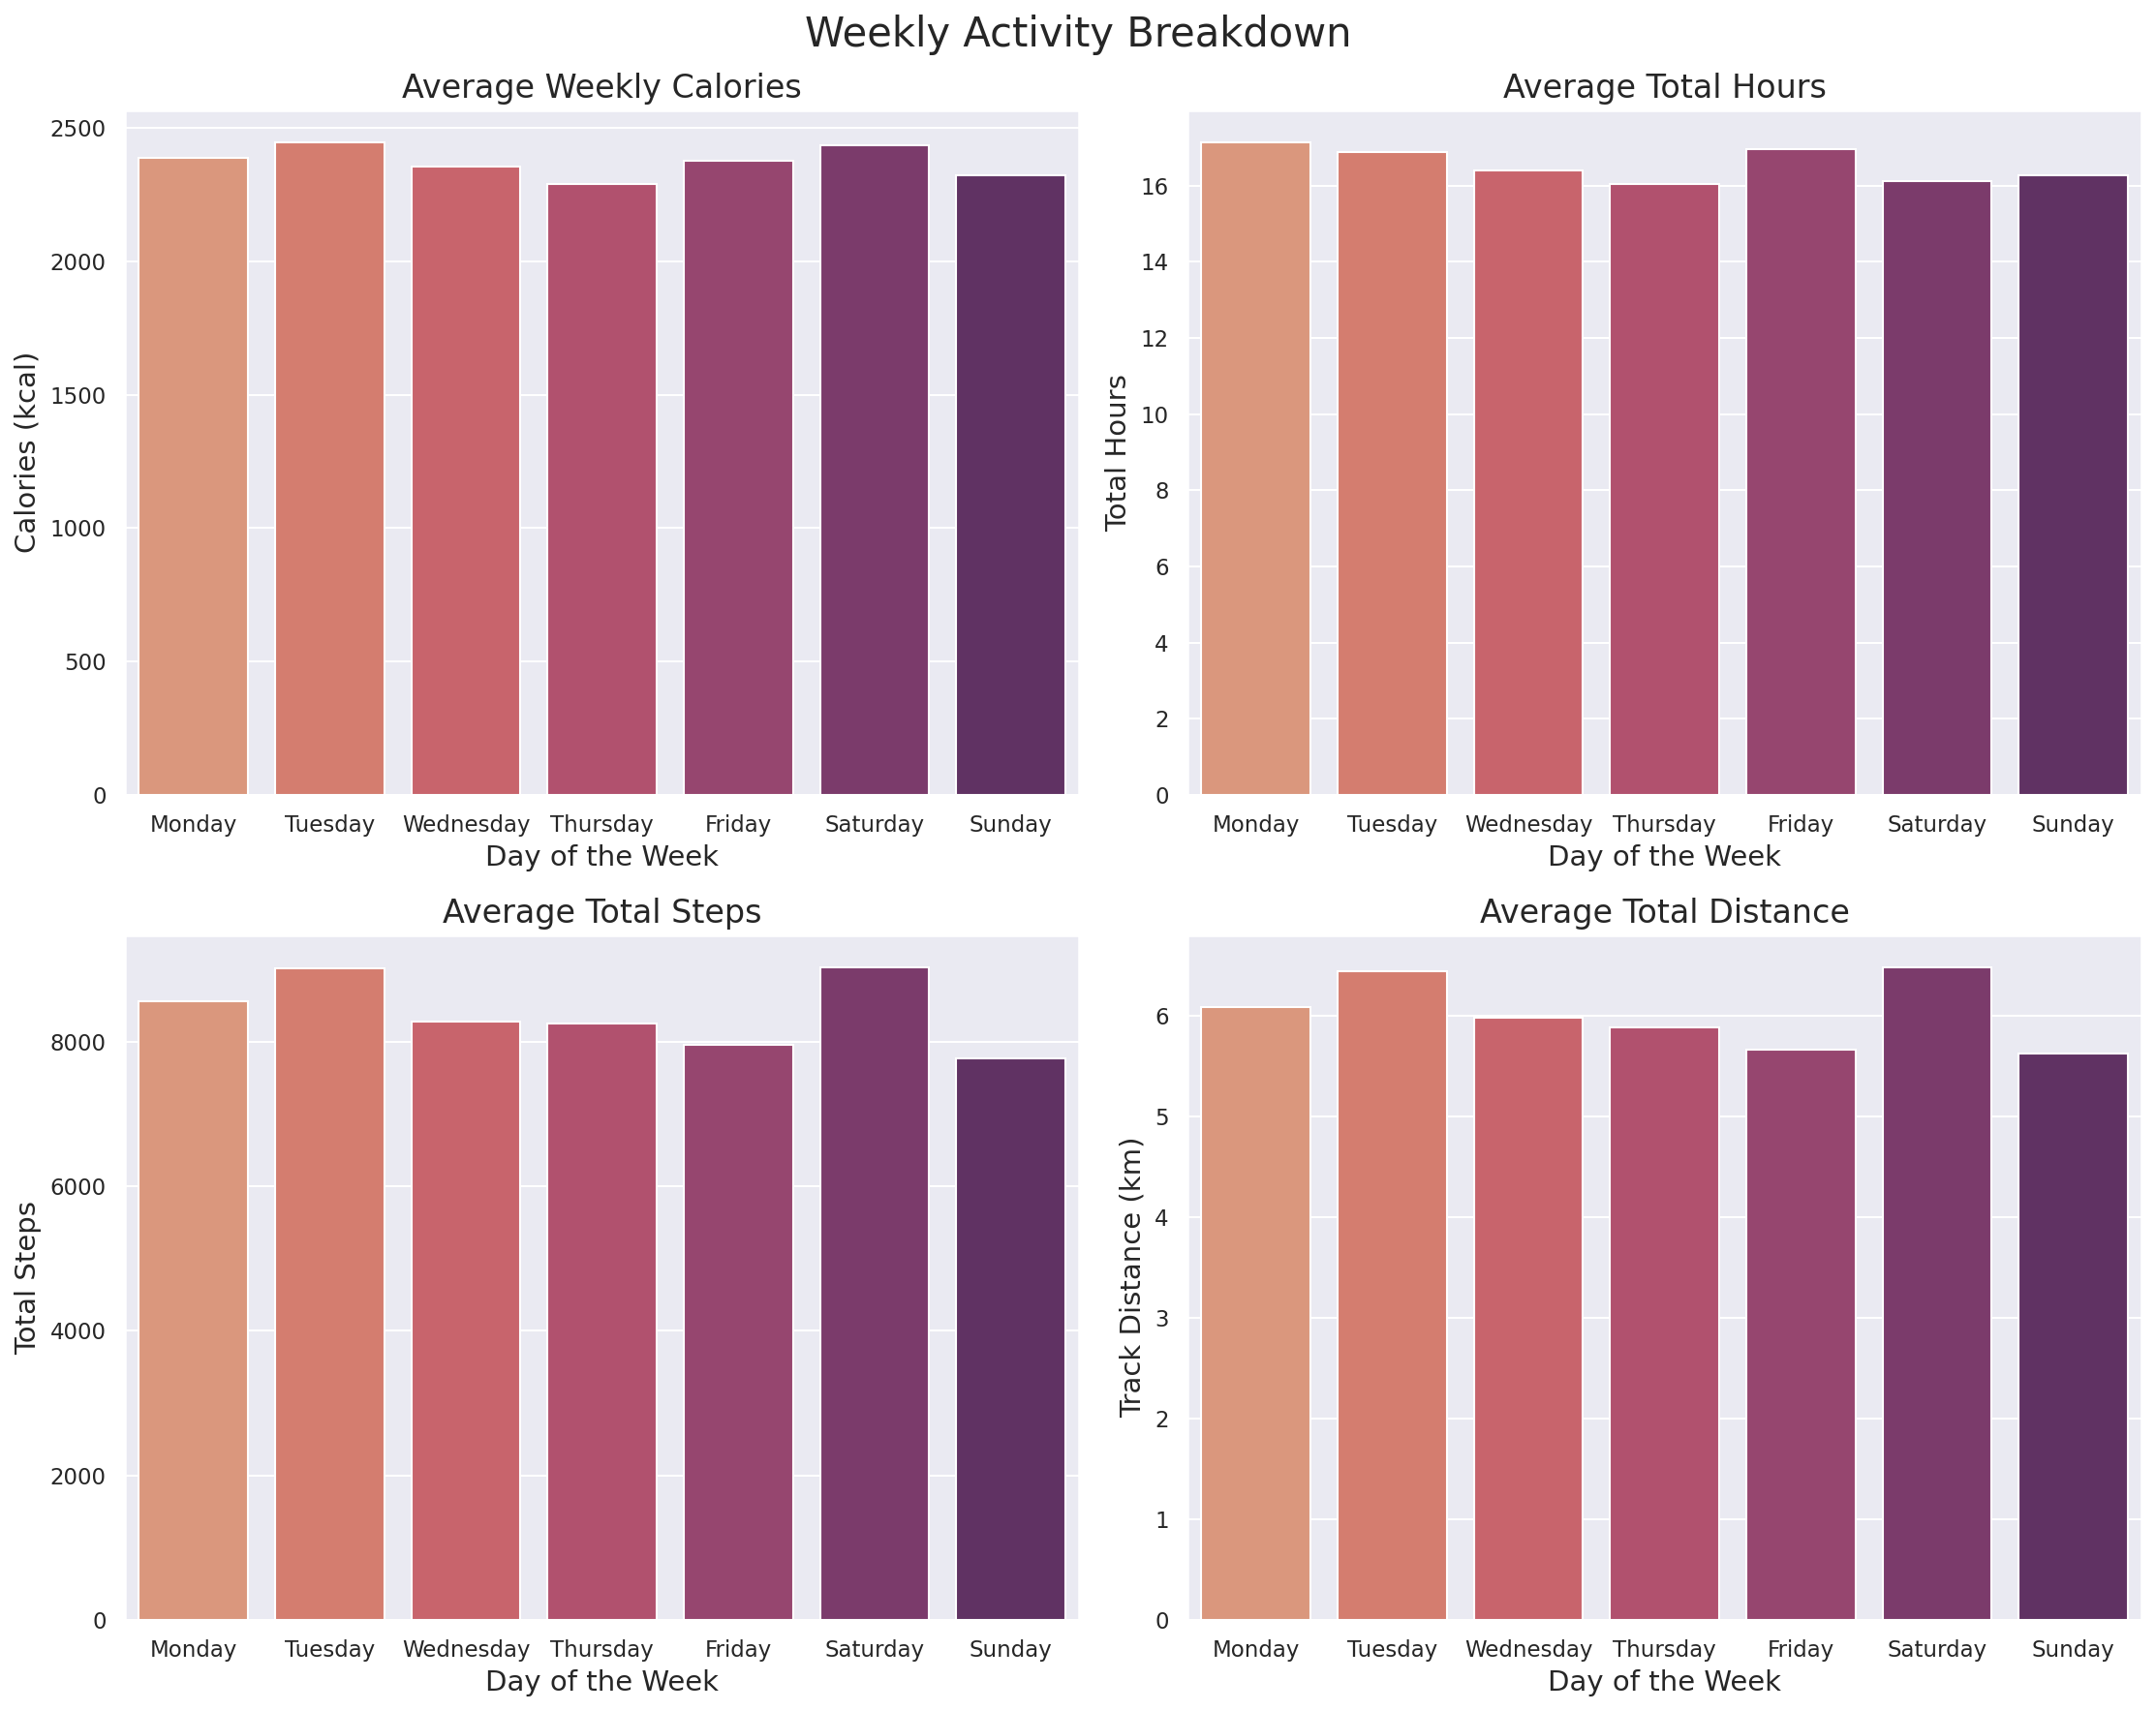

In [84]:
from matplotlib.gridspec import GridSpec

# Aggregate individual user data by day_of_the_week using groupby() and mean() function to get some averages for each day
daily_activity_day = daily_activity.groupby(['day_of_week']).mean().reset_index()

# Define the grid layout for the subplots
the_grid = GridSpec(2, 2)

# Set the plot style
sns.set(style="darkgrid")

# Define the order of the days of the week for plotting
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Create a bar plot for Average Weekly Calories
sns.barplot(y='calories', x='day_of_week', data=daily_activity_day, palette='flare', order=order, ax=axs[0, 0])
axs[0, 0].set_ylabel('Calories (kcal)', size=14)
axs[0, 0].set_xlabel('Day of the Week', size=14)
axs[0, 0].set_title('Average Weekly Calories', size=16)

# Create a bar plot for Average Total Hours
sns.barplot(y='total_hours', x='day_of_week', data=daily_activity_day, palette='flare', order=order, ax=axs[0, 1])
axs[0, 1].set_ylabel('Total Hours', size=14)
axs[0, 1].set_xlabel('Day of the Week', size=14)
axs[0, 1].set_title('Average Total Hours', size=16)

# Create a bar plot for Average Total Steps
sns.barplot(y='total_steps', x='day_of_week', data=daily_activity_day, palette='flare', order=order, ax=axs[1, 0])
axs[1, 0].set_ylabel('Total Steps', size=14)
axs[1, 0].set_xlabel('Day of the Week', size=14)
axs[1, 0].set_title('Average Total Steps', size=16)

# Create a bar plot for Average Total Distance
sns.barplot(y='track_distance', x='day_of_week', data=daily_activity_day, palette='flare', order=order, ax=axs[1, 1])
axs[1, 1].set_ylabel('Track Distance (km)', size=14)
axs[1, 1].set_xlabel('Day of the Week', size=14)
axs[1, 1].set_title('Average Total Distance', size=16)

# Add a super-title for the figure
fig.suptitle('Weekly Activity Breakdown', fontsize=20)

# Adjust the spacing between the subplots
plt.tight_layout()

#plt.savefig('Weekly Activity Breakdown.png', bbox_inches='tight')

# Display the plot
plt.show()


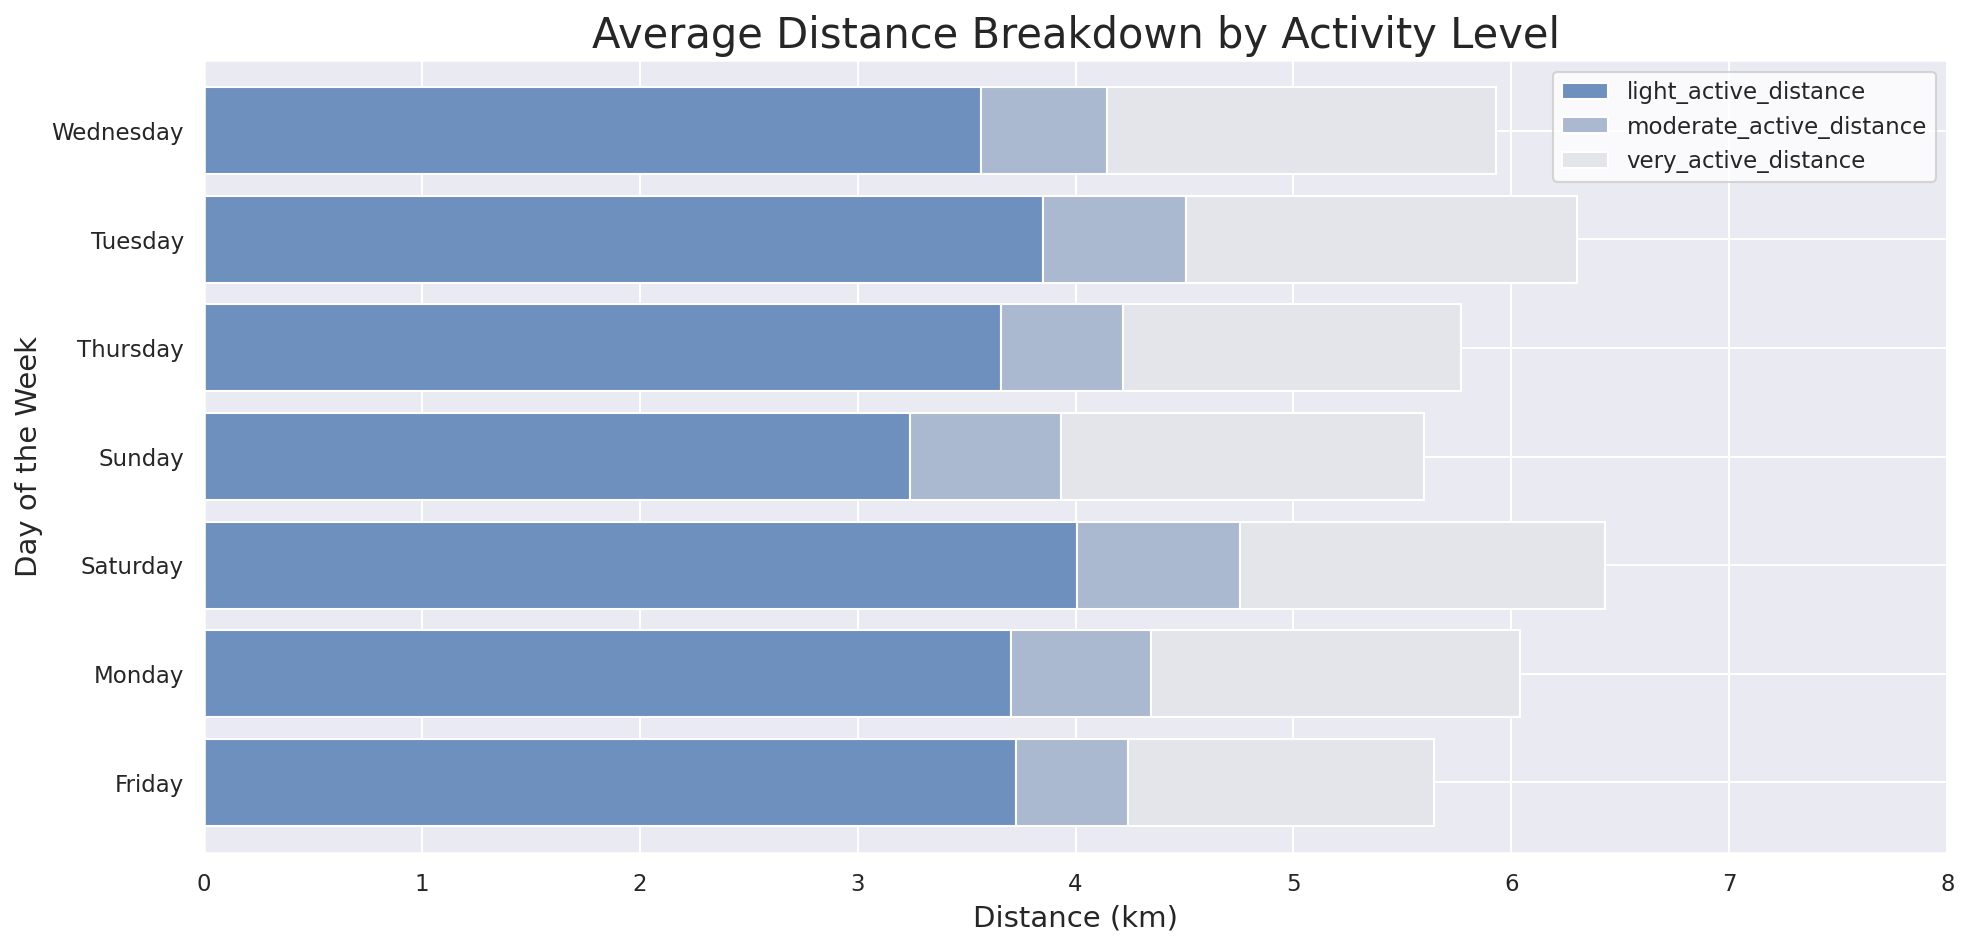

In [85]:
# Group the daily activity data by day of the week and calculate the mean
daily_activity_dist = daily_activity.groupby('day_of_week').mean().reset_index()

# Select the columns of interest
df = daily_activity_dist[['day_of_week', 'light_active_distance', 'moderate_active_distance', 'very_active_distance']]

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_style('whitegrid')

df.set_index('day_of_week').plot(kind='barh', stacked=True, width=0.8, color=sns.color_palette('vlag'), ax=ax)

# Set the labels and title
plt.xlabel('Distance (km)', size=14)
plt.ylabel('Day of the Week', size=14)
plt.title('Average Distance Breakdown by Activity Level', size=20)

# Set the x-axis limits and legend location
plt.xlim(0, 8)
plt.legend(loc='upper right')
plt.savefig('Average Distance Breakdown by Activity Level.png', bbox_inches='tight')

# Display the plot
plt.show()

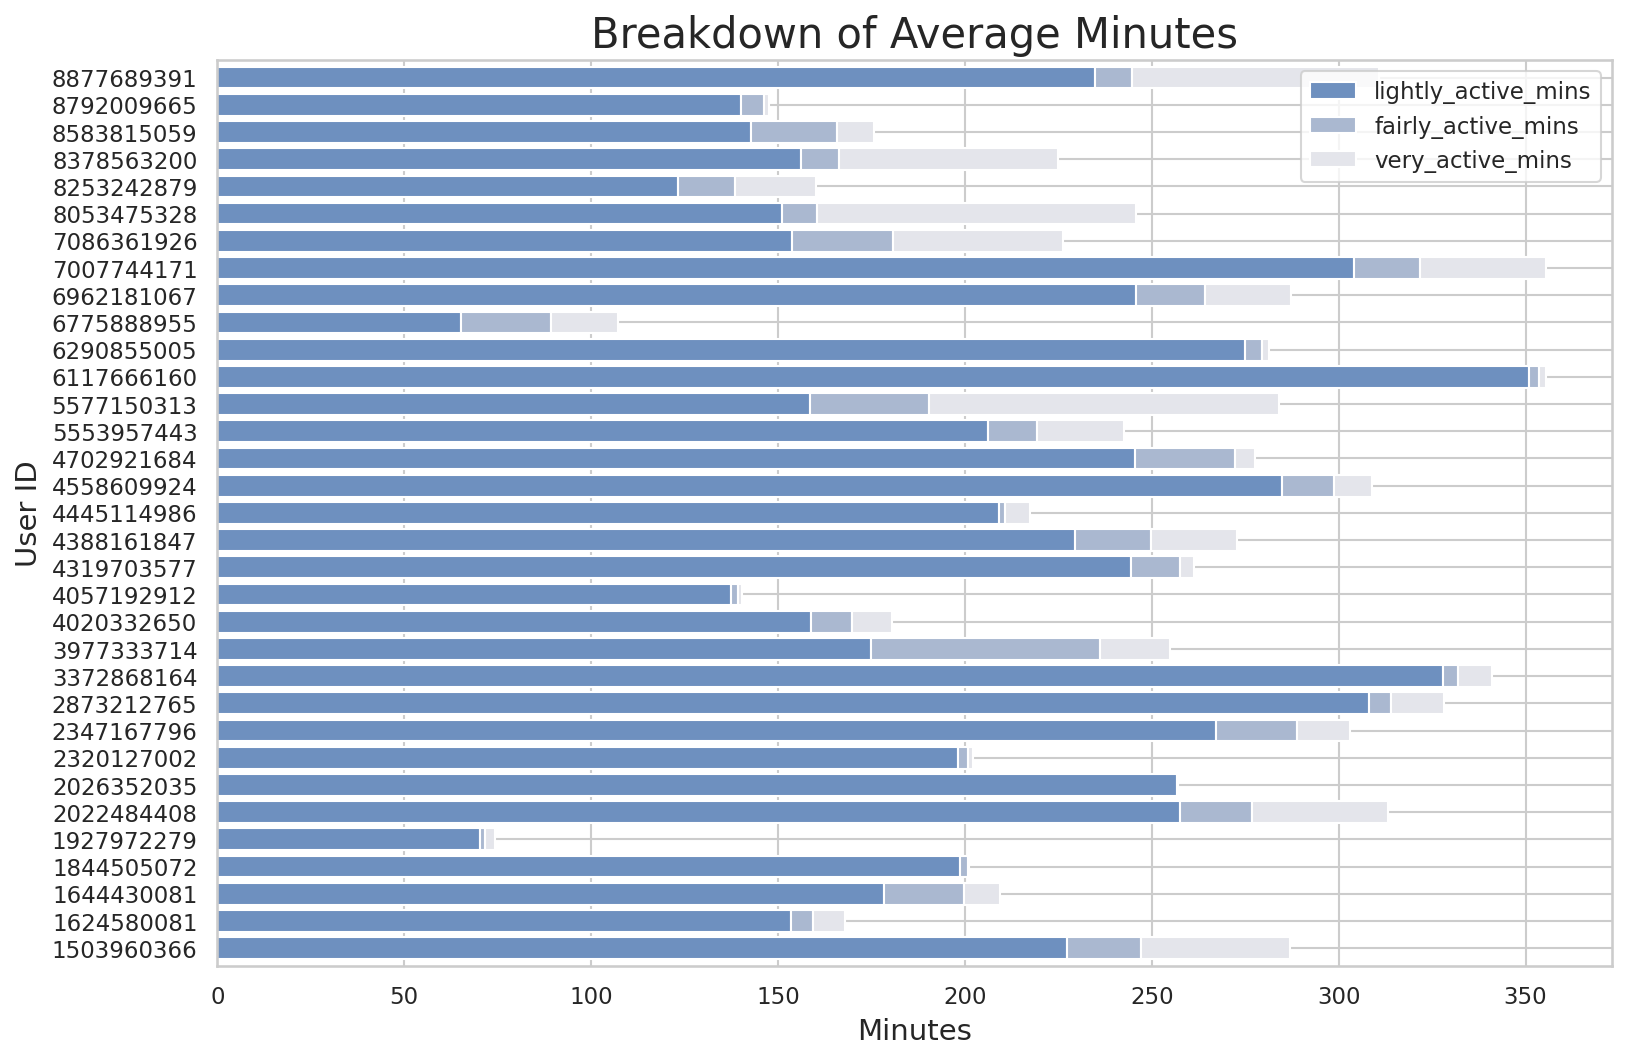

In [86]:
# Aggregate individual user data by ID using groupby() and mean() function to get some averages for each user:
daily_activity_by_user = daily_activity.groupby(['id']).mean().reset_index()

# Select only the columns of interest for plotting:
df = daily_activity_by_user[['id', 'lightly_active_mins', 'fairly_active_mins', 'very_active_mins']]

# Create a horizontal stacked bar chart to show the breakdown of average minutes for each user:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('whitegrid')
df.set_index('id').plot(kind='barh', stacked=True, width=0.8, ax=ax, color=sns.color_palette("vlag"))

# Add labels and titles to the chart:
plt.xlabel('Minutes', size=14)
plt.ylabel('User ID', size=14)
plt.title('Breakdown of Average Minutes', size=20)
plt.legend(loc='upper right')

#plt.savefig('Breakdown of Average Minutes.png', bbox_inches='tight')

plt.show()


### hourly_calories

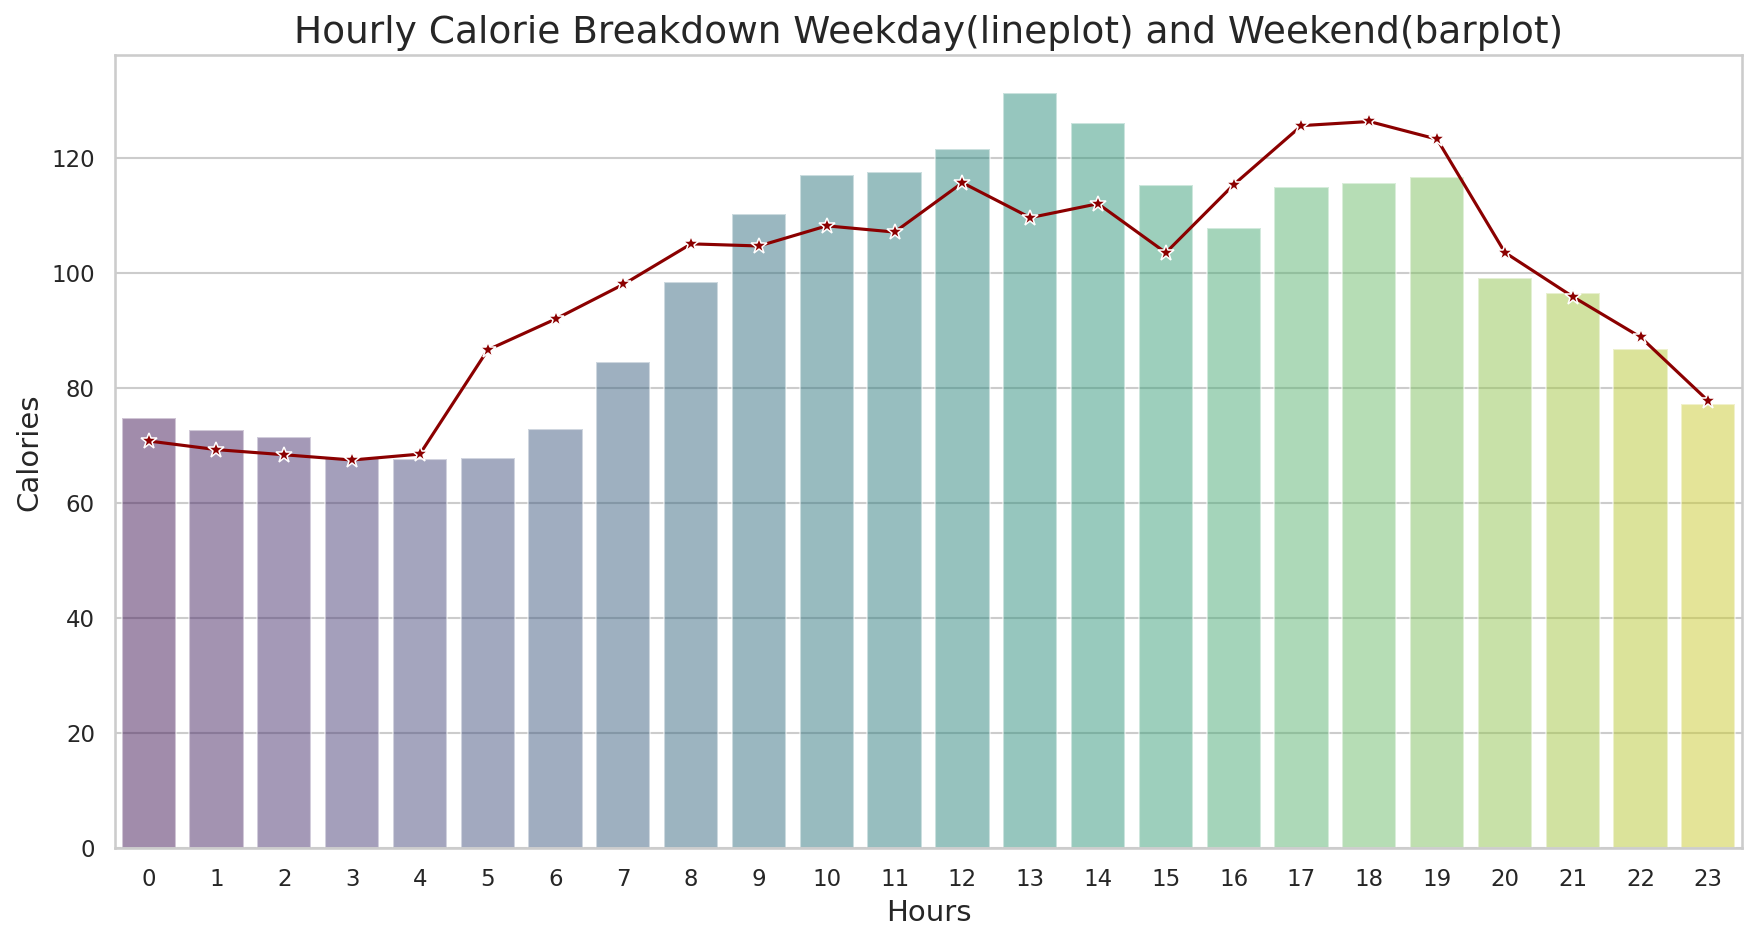

In [87]:
# Subset data for weekend and weekday
hourly_calories_weekend = hourly_calories[hourly_calories['day_of_week_no'] >= 5]
hourly_calories_weekday = hourly_calories[hourly_calories['day_of_week_no'] < 5]

# Group by hour and calculate mean for each hour
weekday = hourly_calories_weekday.groupby(hourly_calories_weekday["activity_date"].dt.hour).mean().reset_index()
weekend = hourly_calories_weekend.groupby(hourly_calories_weekend["activity_date"].dt.hour).mean().reset_index()

# Create a new figure
fig, ax = plt.subplots(figsize=(14,7))
sns.set_style('darkgrid')

# Add line plot for weekday data
sns.lineplot(data=weekday, x='activity_date', y='calories', marker='*', markersize=8, color='darkred', ax=ax)

# Add bar plot for weekend data
sns.barplot(data=weekend, x='activity_date', y='calories', alpha=.5, palette='viridis', ax=ax)

# Set axes labels and title
ax.set_xlabel('Hours', size=14)
ax.set_ylabel('Calories', size=14)
ax.set_title('Hourly Calorie Breakdown Weekday(lineplot) and Weekend(barplot)', size=18)

#plt.savefig('Calorie Breakdown Weekday Weekend.png', bbox_inches='tight')


# Set figure DPI
plt.rcParams['figure.dpi'] = 250


- Looking at the lineplot, it can be seen that users are most active between 12pm and 2pm (lunchtime) and from 5pm till 7pm (after work) on weekdays.
- Looking at the barplot, it can be seen that users are not much active on weekend morning between 5am to 7am as compared to weekdays.

### weight_log

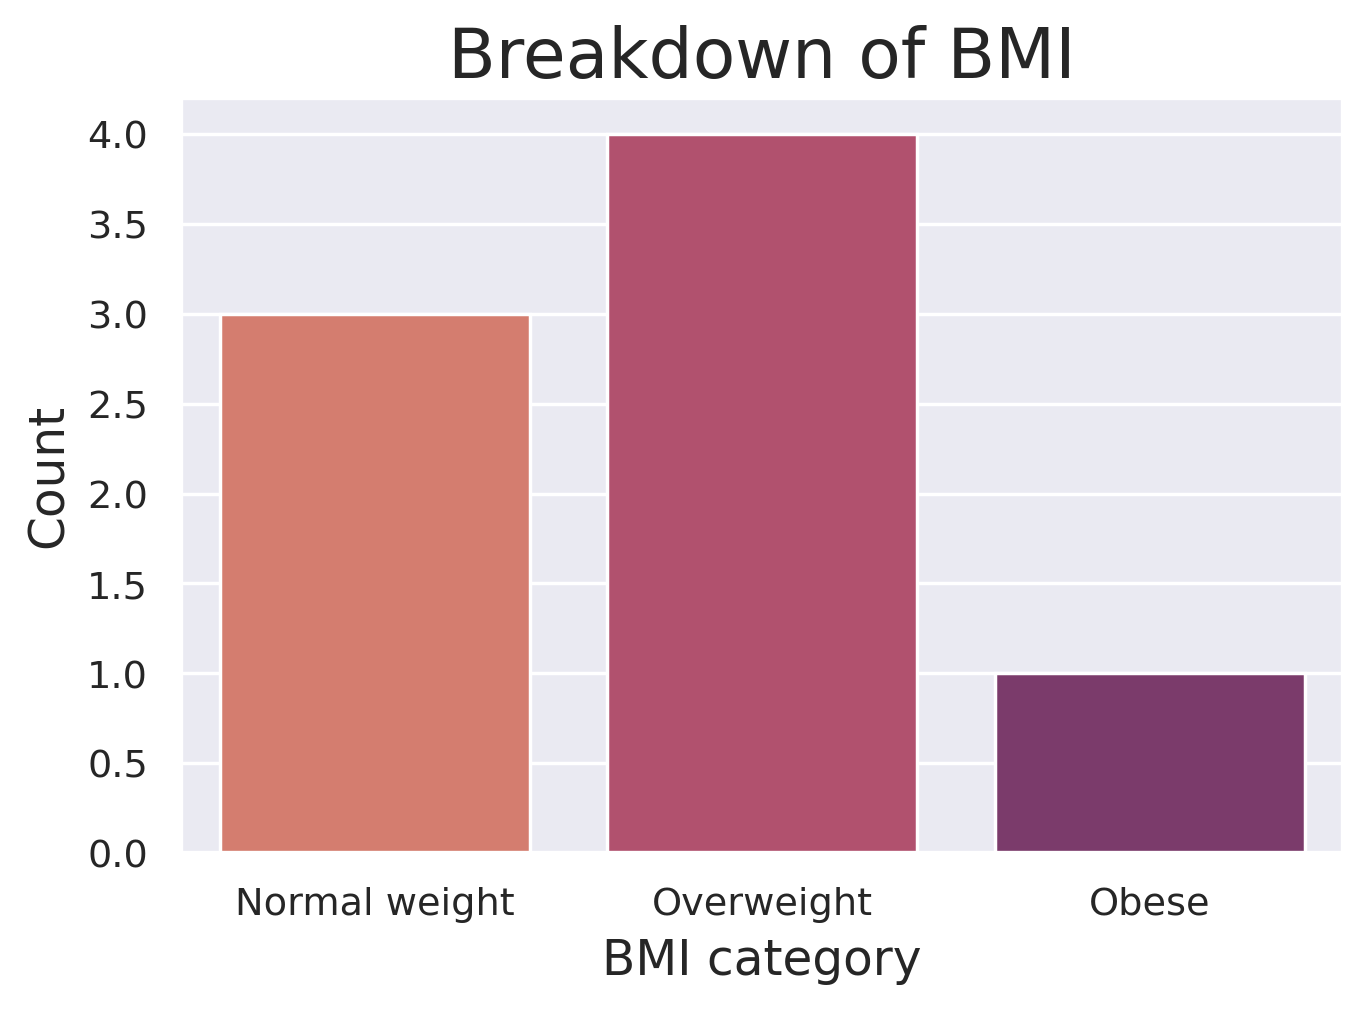

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_bmi_category(bmi):
    if bmi >18.5 and bmi <25:
        return "Normal weight"
    elif bmi >=25 and bmi <30:
        return "Overweight"
    elif bmi >=30:
        return "Obese"

# group by id and calculate the mean of each group
df = weight_log.groupby('id').mean().reset_index()

# add a new column with BMI category based on the bmi column
df['BMI_category'] = df['bmi'].apply(get_bmi_category)

# plot the count of each BMI category on the same axis
sns.countplot(x='BMI_category', data=df, order=['Normal weight', 'Overweight', 'Obese'], palette='flare')
plt.xlabel('BMI category', size=14)
plt.ylabel('Count', size=14)
plt.title('Breakdown of BMI', size=20)

plt.show()


### sleep_day

In [89]:
sleep_day['wake_time']= sleep_day['total_time_in_bed']-sleep_day['total_mins_sleep']
sleep_day.groupby('id').mean().head()

,total_sleep_records,total_mins_sleep,total_time_in_bed,wake_time
id,,,,
1503960366,1.08,360.280000,383.200000,22.920000
1644430081,1.00,294.000000,346.000000,52.000000
1844505072,1.00,652.000000,961.000000,309.000000
1927972279,1.60,417.000000,437.800000,20.800000
2026352035,1.00,506.178571,537.642857,31.464286


In [90]:
df1 = sleep_day.groupby('id').mean().reset_index()

#create a function that groups users in 3 categories: sleep <7 hours, sleep 7-8 hours, sleep >8 hours
def assign_ranges(x):
    if x<420:
        return "less than 7 hours"
    elif x>=420 and x<480:
        return "7- 8 hours"
    else:
        return "more than 8 hours"
    
#use lambda function to create a new column based on ranges   
df1['total_mins_sleep_ranges'] = df1['total_mins_sleep'].apply(lambda x: assign_ranges(x))

df2 = sleep_day.groupby('id').mean().reset_index()

#create a function that groups users in 3 categories: sleep <7 hours, sleep 7-8 hours, sleep >8 hours
def assign_ranges(x):
    if x<420:
        return "less than 7 hours"
    elif x>=420 and x<480:
        return "7- 8 hours"
    else:
        return "more than 8 hours"
    
#use lambda function to create a new column based on ranges   
df2['total_time_in_bed_range'] = df2['total_time_in_bed'].apply(lambda x: assign_ranges(x))

Text(0.5, 0.98, 'Average Bed and Sleep time')

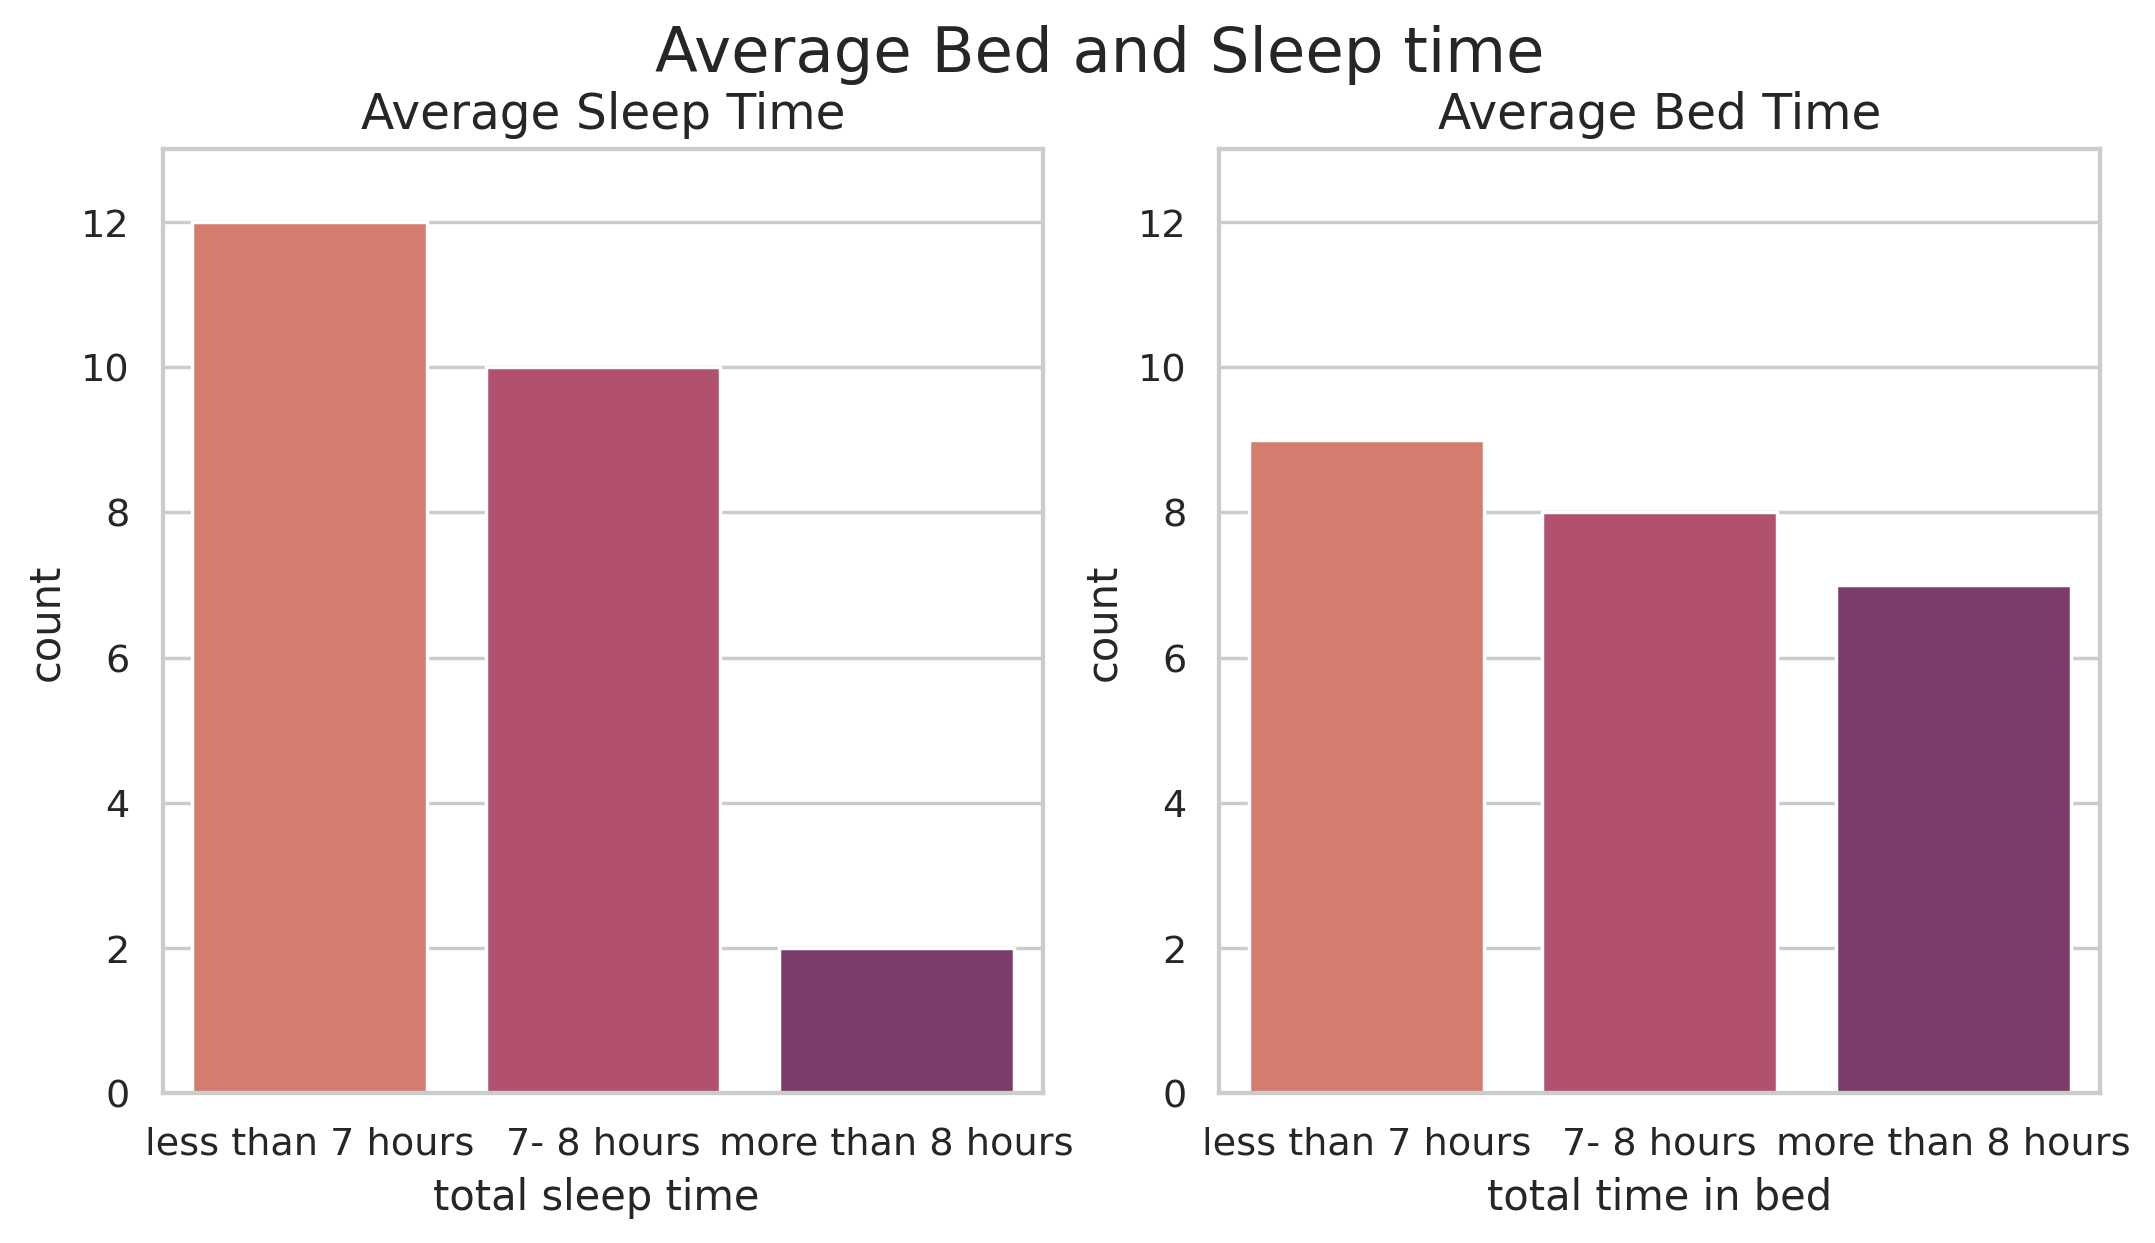

In [91]:
from matplotlib.gridspec import GridSpec
the_grid = GridSpec(1, 2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
sns.set(style="whitegrid")


plt.subplot(the_grid[0, 0], title='')
sns.countplot(x="total_mins_sleep_ranges", data=df1, order=["less than 7 hours", "7- 8 hours", "more than 8 hours"], palette = "flare")
plt.xlabel('total sleep time ', size=12)
plt.title('Average Sleep Time', size = 14);
plt.ylim(0,13)

plt.subplot(the_grid[0, 1], title='')
sns.countplot(x="total_time_in_bed_range", data=df2, order=["less than 7 hours", "7- 8 hours", "more than 8 hours"], palette = "flare")
plt.xlabel('total time in bed', size=12)
plt.title('Average Bed Time', size = 14)
plt.ylim(0,13)

plt.suptitle('Average Bed and Sleep time',size = 18)

- It seems people are more likely to spend their time in bed rather than they fell asleep.

# 5. Share
### 5.1 Key insights
- The majority of users do not take enough steps to be considered active
- Invest in additional data capture techniques as current datasets provide a small sample size and do not include any demographic details
- The Sedentary minutes is around 983.5 which is fairly high compare to others.
- Users are most active between 12pm and 2pm (lunchtime) and from 5pm till 7pm (after work) on weekdays.
- People are more likely to spend their time in bed rather than they fell asleep.

# 6. Act
### 6.1 Recommendations
- Bellabeat can focus on people with health problems such as (diabetes, high blood pressure) and help them to monitor their health with smart gadgets.
- Bellabeat can also involve our company with athletes' intelligence and help them to analyze their overall performance.
- Bellabeat can increase user's engagement by motivating them to participate in competitions or by goal - setting activities and we can also help them by sneding reminders on the phone.
- Create wellness guides within the app to inform strategies for workout and give exercise recommendations based on lifestyle.
- Bellabeat can implement some step goal rewards for the people who achieved more steps thoughtout the week.